In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

# 1. Import data

In [2]:
df = pd.read_csv('/Users/reesezhuang/Desktop/NYU Stern/Marketing  Analytics/Assignment 2/transactions_n100000.csv')

In [3]:
df.head()

,ticket_id,order_timestamp,location,item_name,item_count,lat,long
0,0x872a40,2019-02-28 18:33:00,4,shake,2,41.889047,-87.803605
1,0x872a40,2019-02-28 18:33:00,4,burger,2,41.889047,-87.803605
2,0x872a40,2019-02-28 18:33:00,4,fries,2,41.889047,-87.803605
3,0x598eb3,2019-09-18 11:59:00,5,burger,1,41.881818,-87.640234
4,0x598eb3,2019-09-18 11:59:00,5,salad,2,41.881818,-87.640234


# 2. Exploratory data analysis

In [4]:
df.shape

(260741, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260741 entries, 0 to 260740
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   ticket_id        260741 non-null  object 
 1   order_timestamp  260741 non-null  object 
 2   location         260741 non-null  int64  
 3   item_name        260741 non-null  object 
 4   item_count       260741 non-null  int64  
 5   lat              260741 non-null  float64
 6   long             260741 non-null  float64
dtypes: float64(2), int64(2), object(3)
memory usage: 13.9+ MB


In [6]:
df.isnull().sum()

ticket_id          0
order_timestamp    0
location           0
item_name          0
item_count         0
lat                0
long               0
dtype: int64

In [7]:
df.describe()

,location,item_count,lat,long
count,260741.000000,260741.000000,260741.000000,260741.000000
mean,5.128123,2.446424,41.836145,-87.733627
std,2.557513,1.330490,0.144791,0.135937
min,1.000000,1.000000,41.524598,-88.010140
25%,3.000000,1.000000,41.784576,-87.849468
50%,5.000000,2.000000,41.881818,-87.677606
75%,7.000000,4.000000,41.889047,-87.627059
max,9.000000,5.000000,42.049306,-87.607565


In [8]:
df['location'].value_counts()

2    37343
6    37032
9    34083
4    33890
7    33547
8    22082
3    21257
1    21216
5    20291
Name: location, dtype: int64

In [9]:
df['item_name'].value_counts()

fries     100000
burger     76114
shake      46283
salad      38344
Name: item_name, dtype: int64

In [10]:
df.drop(['lat', 'long'], axis=1, inplace=True) #already have loacation information, we do not need to have latitude and longitude

# 3. Data pre-processing

## 3.1 Split meal time into morning, midday, evening and late night

In [11]:
df['date'] = pd.to_datetime(df['order_timestamp'])
df['time'] = df['date'].dt.time

In [12]:
import datetime
mornStart = datetime.time(4, 0, 1)
mornEnd = datetime.time(10, 0, 0)
midStart = datetime.time(10, 0, 1)
midEnd = datetime.time(16, 0, 0)
eveStart = datetime.time(16, 0, 1)
eveEnd = datetime.time(22, 0, 0)
lateStart = datetime.time(22, 0, 1)
lateEnd = datetime.time(4, 0, 0)
timecat = []
for k in df['time']:
    if mornStart <= k <= mornEnd: #morning
        timecat.append('morning')
    elif midStart <= k <= midEnd: #midday
        timecat.append('midday')
    elif eveStart <= k <= eveEnd: #evening
        timecat.append('evening')
    elif lateStart <= k or lateEnd >= k: #late night
        timecat.append('late_night')

In [13]:
df['timecat'] = timecat

In [14]:
df['timecat'].value_counts()

evening       106677
late_night     78376
midday         75688
Name: timecat, dtype: int64

In [15]:
df.head()

,ticket_id,order_timestamp,location,item_name,item_count,date,time,timecat
0,0x872a40,2019-02-28 18:33:00,4,shake,2,2019-02-28 18:33:00,18:33:00,evening
1,0x872a40,2019-02-28 18:33:00,4,burger,2,2019-02-28 18:33:00,18:33:00,evening
2,0x872a40,2019-02-28 18:33:00,4,fries,2,2019-02-28 18:33:00,18:33:00,evening
3,0x598eb3,2019-09-18 11:59:00,5,burger,1,2019-09-18 11:59:00,11:59:00,midday
4,0x598eb3,2019-09-18 11:59:00,5,salad,2,2019-09-18 11:59:00,11:59:00,midday


## 2.1 Judge whether a date is a weekday

In [16]:
df['weekday'] = df['date'].dt.dayofweek

In [17]:
df['weekday'] = np.where(df['weekday'] < 6, '1', '0')

In [18]:
df['weekday'].value_counts()

1    223505
0     37236
Name: weekday, dtype: int64

In [19]:
df.drop(['order_timestamp', 'date', 'time'], axis=1, inplace=True)

In [20]:
df = df[['ticket_id', 'location', 'timecat', 'weekday', 'item_name','item_count']] #reorder the column
df

,ticket_id,location,timecat,weekday,item_name,item_count
0,0x872a40,4,evening,1,shake,2
1,0x872a40,4,evening,1,burger,2
2,0x872a40,4,evening,1,fries,2
3,0x598eb3,5,midday,1,burger,1
4,0x598eb3,5,midday,1,salad,2
...,...,...,...,...,...,...
260736,0x3c0582,9,evening,1,burger,3
260737,0x3c0582,9,evening,1,salad,1
260738,0x3c0582,9,evening,1,fries,4
260739,0x104597,2,late_night,1,burger,3


## 3.2 Feature engineering via get_dummies()

In [21]:
df_new = pd.get_dummies(df, columns = ['timecat', 'item_name'])

In [22]:
df_new

,ticket_id,location,weekday,item_count,timecat_evening,timecat_late_night,timecat_midday,item_name_burger,item_name_fries,item_name_salad,item_name_shake
0,0x872a40,4,1,2,1,0,0,0,0,0,1
1,0x872a40,4,1,2,1,0,0,1,0,0,0
2,0x872a40,4,1,2,1,0,0,0,1,0,0
3,0x598eb3,5,1,1,0,0,1,1,0,0,0
4,0x598eb3,5,1,2,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
260736,0x3c0582,9,1,3,1,0,0,1,0,0,0
260737,0x3c0582,9,1,1,1,0,0,0,0,1,0
260738,0x3c0582,9,1,4,1,0,0,0,1,0,0
260739,0x104597,2,1,3,0,1,0,1,0,0,0


In [23]:
df_new['burger'] = df_new['item_name_burger'] * df_new['item_count']
df_new['fries'] = df_new['item_name_fries'] * df_new['item_count']
df_new['salad'] = df_new['item_name_salad'] * df_new['item_count']
df_new['shake'] = df_new['item_name_shake'] * df_new['item_count']

In [24]:
df_new

,ticket_id,location,weekday,item_count,timecat_evening,timecat_late_night,timecat_midday,item_name_burger,item_name_fries,item_name_salad,item_name_shake,burger,fries,salad,shake
0,0x872a40,4,1,2,1,0,0,0,0,0,1,0,0,0,2
1,0x872a40,4,1,2,1,0,0,1,0,0,0,2,0,0,0
2,0x872a40,4,1,2,1,0,0,0,1,0,0,0,2,0,0
3,0x598eb3,5,1,1,0,0,1,1,0,0,0,1,0,0,0
4,0x598eb3,5,1,2,0,0,1,0,0,1,0,0,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260736,0x3c0582,9,1,3,1,0,0,1,0,0,0,3,0,0,0
260737,0x3c0582,9,1,1,1,0,0,0,0,1,0,0,0,1,0
260738,0x3c0582,9,1,4,1,0,0,0,1,0,0,0,4,0,0
260739,0x104597,2,1,3,0,1,0,1,0,0,0,3,0,0,0


In [25]:
df_new = df_new.drop(['item_name_burger', 'item_name_fries', 'item_name_salad', 'item_name_shake'],axis = 1)

In [26]:
df_new

,ticket_id,location,weekday,item_count,timecat_evening,timecat_late_night,timecat_midday,burger,fries,salad,shake
0,0x872a40,4,1,2,1,0,0,0,0,0,2
1,0x872a40,4,1,2,1,0,0,2,0,0,0
2,0x872a40,4,1,2,1,0,0,0,2,0,0
3,0x598eb3,5,1,1,0,0,1,1,0,0,0
4,0x598eb3,5,1,2,0,0,1,0,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...
260736,0x3c0582,9,1,3,1,0,0,3,0,0,0
260737,0x3c0582,9,1,1,1,0,0,0,0,1,0
260738,0x3c0582,9,1,4,1,0,0,0,4,0,0
260739,0x104597,2,1,3,0,1,0,3,0,0,0


In [27]:
df_new = df_new.groupby(['ticket_id','timecat_evening','timecat_late_night','timecat_midday', 'weekday'],
                 as_index=False, sort=False).agg({
    'burger':'sum', 
    'fries':'sum',
    'salad':'sum',
    'shake':'sum',
    'item_count':'sum',
    'location':'mean'
})

df_new

,ticket_id,timecat_evening,timecat_late_night,timecat_midday,weekday,burger,fries,salad,shake,item_count,location
0,0x872a40,1,0,0,1,2,2,0,2,6,4.0
1,0x598eb3,0,0,1,1,1,3,2,0,6,5.0
2,0x5646c2,0,0,1,1,0,3,3,0,6,3.0
3,0x4022cf,0,0,1,1,0,4,4,0,8,4.0
4,0x7a39d9,1,0,0,1,5,5,0,5,15,7.0
...,...,...,...,...,...,...,...,...,...,...,...
99995,0x75c9e7,0,1,0,0,2,2,0,0,4,6.0
99996,0x66f1df,0,1,0,1,1,1,0,0,2,6.0
99997,0x4e2756,1,0,0,1,4,4,0,4,12,8.0
99998,0x3c0582,1,0,0,1,3,4,1,3,11,9.0


In [28]:
df_new = df_new.drop(['ticket_id'],axis = 1)

### Deal with location

In [29]:
df_new['location'] = df_new['location'].astype(int)
location_values = { 
    1: 'location1', 
    2: 'location2', 
    3: 'location3', 
    4: 'location4', 
    5: 'location5', 
    6: 'location6', 
    7: 'location7', 
    8: 'location8', 
    9: 'location9', 
}

df_new.location = df_new.location.map(location_values) 
df_new.head()

,timecat_evening,timecat_late_night,timecat_midday,weekday,burger,fries,salad,shake,item_count,location
0,1,0,0,1,2,2,0,2,6,location4
1,0,0,1,1,1,3,2,0,6,location5
2,0,0,1,1,0,3,3,0,6,location3
3,0,0,1,1,0,4,4,0,8,location4
4,1,0,0,1,5,5,0,5,15,location7


In [30]:
df_new = pd.get_dummies(df_new, columns = ['location'])

In [31]:
df_new.head()

,timecat_evening,timecat_late_night,timecat_midday,weekday,burger,fries,salad,shake,item_count,location_location1,location_location2,location_location3,location_location4,location_location5,location_location6,location_location7,location_location8,location_location9
0,1,0,0,1,2,2,0,2,6,0,0,0,1,0,0,0,0,0
1,0,0,1,1,1,3,2,0,6,0,0,0,0,1,0,0,0,0
2,0,0,1,1,0,3,3,0,6,0,0,1,0,0,0,0,0,0
3,0,0,1,1,0,4,4,0,8,0,0,0,1,0,0,0,0,0
4,1,0,0,1,5,5,0,5,15,0,0,0,0,0,0,1,0,0


## 3.3 Normalization via MinMaxScaler and PCA

In [32]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
col_name = list(df_new.columns.values.tolist())
df_new = pd.DataFrame(scaler.fit_transform(df_new), columns = col_name)

In [33]:
df_new

,timecat_evening,timecat_late_night,timecat_midday,weekday,burger,fries,salad,shake,item_count,location_location1,location_location2,location_location3,location_location4,location_location5,location_location6,location_location7,location_location8,location_location9
0,1.0,0.0,0.0,1.0,0.4,0.25,0.0,0.4,0.307692,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,1.0,0.2,0.50,0.4,0.0,0.307692,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,1.0,0.0,0.50,0.6,0.0,0.307692,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,1.0,0.0,0.75,0.8,0.0,0.461538,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,1.0,1.0,1.00,0.0,1.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.0,1.0,0.0,0.0,0.4,0.25,0.0,0.0,0.153846,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
99996,0.0,1.0,0.0,1.0,0.2,0.00,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
99997,1.0,0.0,0.0,1.0,0.8,0.75,0.0,0.8,0.769231,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
99998,1.0,0.0,0.0,1.0,0.6,0.75,0.2,0.6,0.692308,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [34]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2) 
X_principal = pca.fit_transform(df_new) 
X_principal = pd.DataFrame(X_principal) 
X_principal.columns = ['P1', 'P2'] 
  
X_principal.head()

,P1,P2
0,0.709434,0.009700
1,-0.465740,0.867062
2,-0.550133,0.944972
3,-0.246442,0.913162
4,1.590326,-0.021085


# 4. K-Mean

## Try 2 clusters first

In [35]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=0) 

kmeans.fit(X_principal)

KMeans(n_clusters=2, random_state=0)

In [36]:
kmeans.cluster_centers_

array([[ 1.10134878,  0.00695   ],
       [-0.55026974, -0.00347244]])

In [37]:
kmeans.inertia_

50781.0450843611

## Find best value of cluster via Elbow

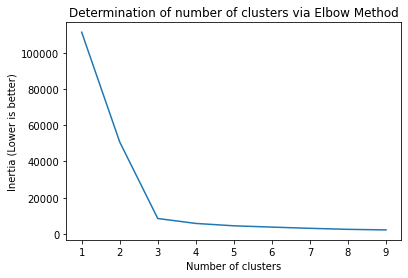

In [94]:
from sklearn.cluster import KMeans
cs = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X_principal)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 10), cs)
plt.title('Determination of number of clusters via Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia (Lower is better)')
plt.show()

In [39]:
from sklearn.metrics import silhouette_score
kmeans = KMeans(n_clusters = 3, init='k-means++')
kmeans.fit(X_principal)
print(silhouette_score(X_principal, kmeans.labels_, metric='euclidean'))

0.7922621635395064


In [40]:
label = kmeans.labels_
center = kmeans.cluster_centers_
print(label)

[0 2 2 ... 0 0 1]


In [41]:
print(center.round(3))

[[ 1.094  0.012]
 [-0.54  -0.785]
 [-0.567  0.813]]


In [42]:
df_new['labels']=kmeans.labels_
df_new.head()

,timecat_evening,timecat_late_night,timecat_midday,weekday,burger,fries,salad,shake,item_count,location_location1,location_location2,location_location3,location_location4,location_location5,location_location6,location_location7,location_location8,location_location9,labels
0,1.0,0.0,0.0,1.0,0.4,0.25,0.0,0.4,0.307692,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0
1,0.0,0.0,1.0,1.0,0.2,0.50,0.4,0.0,0.307692,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2
2,0.0,0.0,1.0,1.0,0.0,0.50,0.6,0.0,0.307692,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2
3,0.0,0.0,1.0,1.0,0.0,0.75,0.8,0.0,0.461538,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2
4,1.0,0.0,0.0,1.0,1.0,1.00,0.0,1.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0


## Visualization

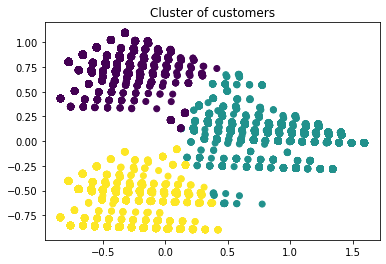

In [91]:
plt.scatter(X_principal['P1'], X_principal['P2'],   
           c = KMeans(n_clusters = 3).fit_predict(X_principal)) 
plt.title('Cluster of customers')
plt.show() 

In [44]:
avg_df = df_new.groupby(['labels'], as_index=False).mean()
avg_df = avg_df.rename(columns={"labels":"Cluster"})

In [45]:
avg_df['Cluster'] +=1
avg_df.head()

,Cluster,timecat_evening,timecat_late_night,timecat_midday,weekday,burger,fries,salad,shake,item_count,location_location1,location_location2,location_location3,location_location4,location_location5,location_location6,location_location7,location_location8,location_location9
0,1,0.995565,0.000952,0.003482,0.859048,0.688494,0.663475,0.042286,0.650488,0.658480,0.032202,0.029583,0.032708,0.268363,0.032857,0.028006,0.264435,0.041518,0.270327
1,2,0.005258,0.994742,0.000000,0.857558,0.347347,0.201611,0.013942,0.064221,0.148769,0.033606,0.395247,0.032489,0.029552,0.021767,0.393191,0.029787,0.033958,0.030404
2,3,0.010847,0.000000,0.989153,0.854534,0.068342,0.310920,0.380394,0.024328,0.200692,0.199518,0.040855,0.200445,0.040639,0.199703,0.039588,0.041350,0.198127,0.039774


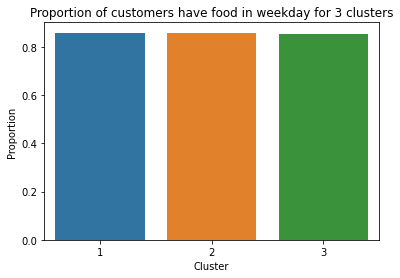

In [67]:
sns.barplot(x='Cluster',y='weekday',data=avg_df).set(title='Proportion of customers have food in weekday for 3 clusters')
plt.ylabel("Proportion")
plt.show()

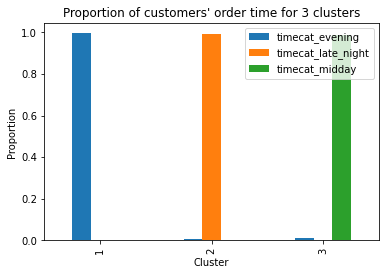

In [63]:
avg_df.plot(x="Cluster", y=['timecat_evening', 'timecat_late_night', 'timecat_midday'], kind="bar")
plt.title("Proportion of customers' order time for 3 clusters")
plt.ylabel("Proportion")
plt.show()

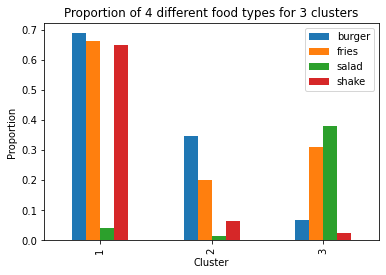

In [71]:
avg_df.plot(x="Cluster", y=['burger', 'fries', 'salad','shake'], kind="bar")
plt.title("Proportion of 4 different food types for 3 clusters")
plt.ylabel("Proportion")
plt.show()

In [72]:
avg_df = avg_df.rename(columns={"location_location1": "CIBC Theatre", 
                       "location_location2": "Evanston Place Apartments",
                       "location_location3": "Design Muesum of Chicago",
                       "location_location4": "Oak Park",
                       "location_location5": "Ogilvie Transportation Center",
                       "location_location6": "University of Chicago",
                       "location_location7": "Downers Grove Neighbourhood",
                       "location_location8": "Hyatt Centric Chicago Magnificent Mile",
                       "location_location9": "Staple (The office Superstore)",
                      })

Text(0, 0.5, 'Proportion')

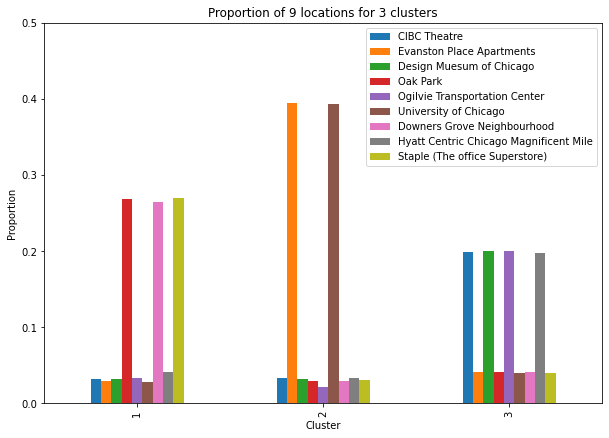

In [90]:
avg_df.plot(x="Cluster", y=['CIBC Theatre', 
                           'Evanston Place Apartments', 
                           'Design Muesum of Chicago',
                           'Oak Park',
                          'Ogilvie Transportation Center', 
                           'University of Chicago', 
                           'Downers Grove Neighbourhood', 
                           'Hyatt Centric Chicago Magnificent Mile', 
                           'Staple (The office Superstore)'], kind="bar",figsize = (10,7))
plt.title("Proportion of 9 locations for 3 clusters")
plt.ylim(0, 0.5)
plt.ylabel("Proportion")

<AxesSubplot:xlabel='Cluster'>

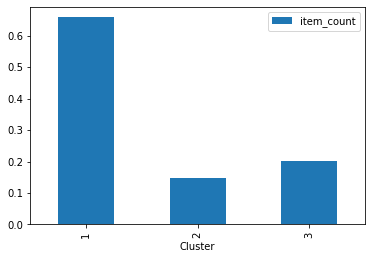

In [76]:
pv = avg_df.groupby(['Cluster'],
                 as_index=False, sort=False).agg({
    'item_count':'sum',
})

pv.plot(x="Cluster", y='item_count', kind="bar")